In [1]:
import gym

In [2]:
import numpy as np
import torch
import time
import matplotlib.pyplot as plt

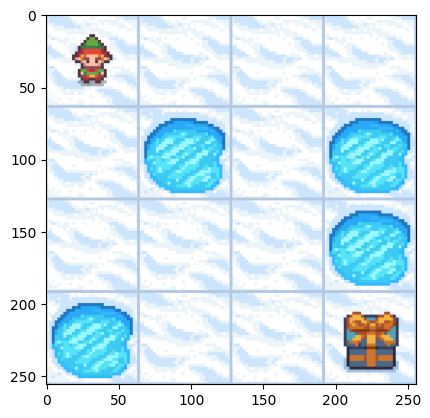

In [3]:
environment = gym.make("FrozenLake-v1", is_slippery=False, render_mode="rgb_array")
environment.reset()
plt.imshow(environment.render())

In [4]:
nb_states = environment.observation_space.n  # = 16
nb_actions = environment.action_space.n      # = 4
qtable = np.zeros((nb_states, nb_actions))
qtable

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

Reward = 0.0


C:\Users\berse\anaconda3\envs\pytorch\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


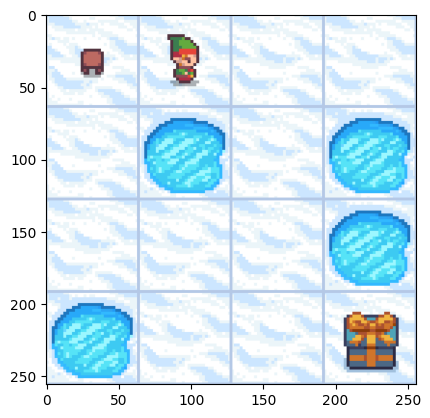

In [5]:
environment.action_space.sample()
environment.step(2)
environment.render()

action = environment.action_space.sample()
plt.imshow(environment.render())

new_state, reward, done, info,a = environment.step(action)

# printing reward and map
environment.render()
print(f'Reward = {reward}')

In [6]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 17})

# re-initialize the Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 1000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor

outcomes = []

print('Q-table before training:')
print(qtable)

# Training
for _ in range(episodes):
    state = environment.reset()[0]
    done = False

    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")

    while not done:
        # Choose the action with the highest value in the current state
        if np.max(qtable[state]) > 0:
          action = np.argmax(qtable[state])

        # If there's no best action (only zeros), take a random one
        else:
          action = environment.action_space.sample()
             
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info,a = environment.step(action)

        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
        # Update our current state
        state = new_state

        # If we have a reward, it means that our outcome is a success
        if reward:
          outcomes[-1] = "Success"

print()
print('===========================================')
print('Q-table after training:')
print(qtable)

Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training:
[[0.      0.59049 0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.6561  0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.729   0.     ]
 [0.      0.81    0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.9     0.     ]
 [0.      0.      1.      0.     ]
 [0.      0.      0.      0.     ]]


In [7]:
outcomes

['Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Success',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Failure',
 'Fa

In [8]:
from IPython.display import clear_output
import time 

state = environment.reset()[0]
done = False
sequence = []

while not done:
    # Choose the action with the highest value in the current state
    if np.max(qtable[state]) > 0:
      action = np.argmax(qtable[state])

    # If there's no best action (only zeros), take a random one
    else:
      action = environment.action_space.sample()
    
    # Add the action to the sequence
    sequence.append(action)

    # Implement this action and move the agent in the desired direction
    new_state, reward, done, info,a = environment.step(action)

    # Update our current state
    state = new_state

    # Update the render
    clear_output(wait=True)
    environment.render()
    time.sleep(1)

print(f"Sequence = {sequence}")

Sequence = [1, 1, 2, 1, 2, 2]


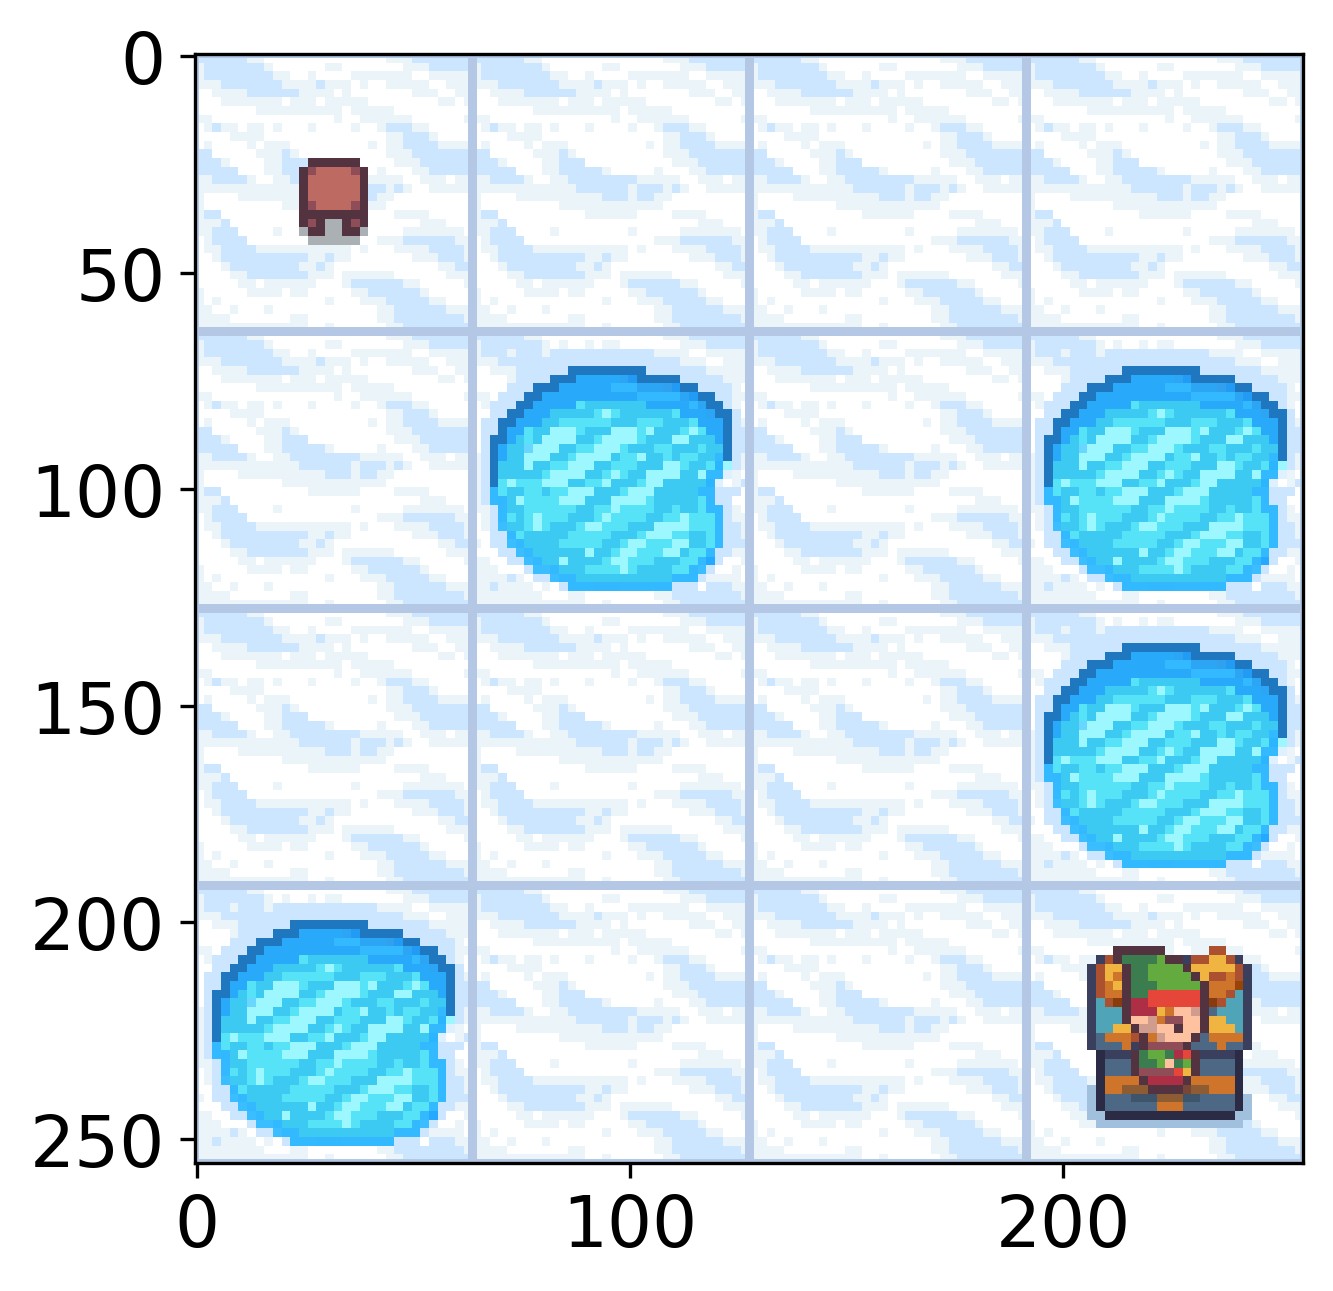

In [9]:
for _ in range(1):
    state = environment.reset()[0]
    done = False
    
    # Until the agent gets stuck or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        if np.max(qtable[state]) > 0:
          action = np.argmax(qtable[state])

        # If there's no best action (only zeros), take a random one
        else:
          action = environment.action_space.sample() 
             
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info,a = environment.step(action)    
        plt.imshow(environment.render()) 

        # Update our current state
        state = new_state

In [10]:
episodes = 100
nb_success = 0

# Evaluation
for _ in range(100):
    state = environment.reset()[0]
    done = False
    
    # Until the agent gets stuck or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        if np.max(qtable[state]) > 0:
          action = np.argmax(qtable[state])

        # If there's no best action (only zeros), take a random one
        else:
          action = environment.action_space.sample()
             
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info,a = environment.step(action)

        # Update our current state
        state = new_state

        # When we get a reward, it means we solved the game
        nb_success += reward

# Let's check our success rate!
print (f"Success rate = {nb_success/episodes*100}%")

Success rate = 100.0%
